# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../data/datasets/bank/bank.csv", sep=";")

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
data.shape

(4119, 21)

In [99]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [3]:
data["y"] = (data["y"]=="yes").astype(int)

In [10]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [11]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [4]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [76]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [15]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [16]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [17]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

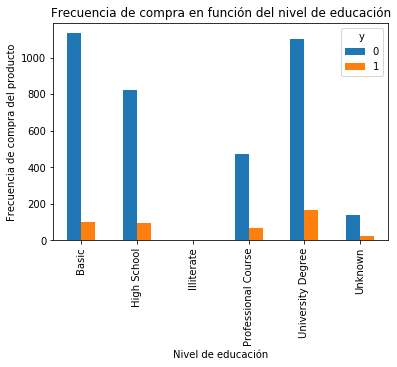

In [22]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

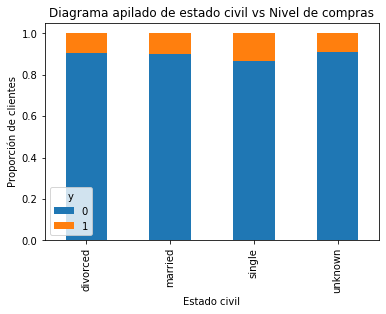

In [27]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil vs Nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

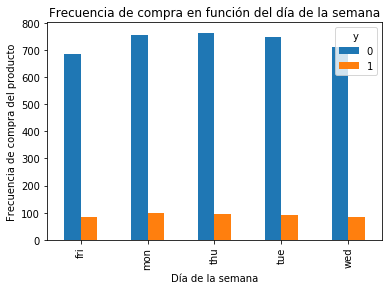

In [28]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

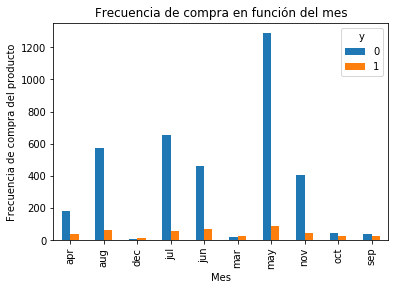

In [29]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

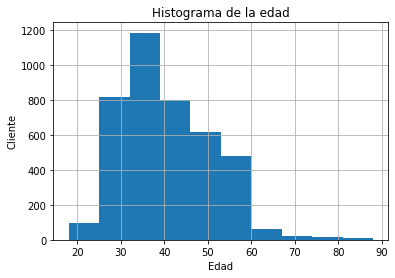

In [30]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

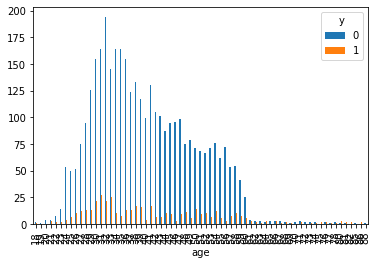

In [32]:
pd.crosstab(data.age, data.y).plot(kind="bar")

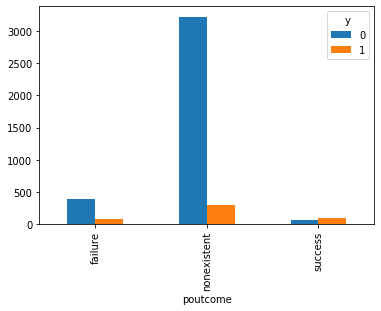

In [33]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### Conversión de las variables categóricas a dummies

In [5]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [6]:
data_vars = data.columns.values.tolist()

In [7]:
to_keep = [v for v in data_vars if v not in categories]
cat = ["job","marital", "education", "default", "loan", "contact", "month", "housing", "day_of_week", "poutcome"]
to_keep = [v for v in data_vars if v not in cat]

In [8]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [9]:
bank_data_vars = bank_data.columns.values
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [10]:
n=12

In [11]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [14]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [15]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [16]:
print(rfe.ranking_)

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 37 28 39 29 11  1  7  1]


In [17]:
z=zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 36),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

In [18]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", "month_jul", "month_jun", 
        "month_mar","month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [19]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [20]:
import statsmodels.api as sm

In [21]:
logit_model = sm.Logit(Y, X)

In [22]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [192]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-04-01 21:42  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [23]:
from sklearn import linear_model

In [24]:
logit_model = linear_model.LogisticRegression(solver='lbfgs')
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
logit_model.score(X,Y)

0.8963340616654528

In [197]:
Y.mean()

0.10949259529011895

In [25]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381961]
1,euribor3m,[-0.5443670397997966]
2,job_blue-collar,[-0.35331387434955497]
3,job_retired,[0.36165159081069853]
4,month_aug,[0.6292588895080167]
5,month_dec,[1.1943974572124378]
6,month_jul,[0.9630554140675373]
7,month_jun,[1.056689705647391]
8,month_mar,[1.6386680234600435]
9,month_nov,[0.45770841910634985]


## Validación del modelo logístico

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [29]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from IPython.display import display, Math, Latex

In [36]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [30]:
probs = lm.predict_proba(X_test)

In [31]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [32]:
prediction = lm.predict(X_test)

In [33]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [40]:
prob = probs[:,1] # Todas las filas, segunda columna del array
prob_df = pd.DataFrame(prob)
threshold = 0.1 # Umbral de probabilidades
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0) # 1 = compra, 0 = no
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [41]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [42]:
390/len(prob_df)*100

31.55339805825243

In [44]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [45]:
331/len(prob_df)*100

26.779935275080906

In [46]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [47]:
732/len(prob_df)*100

59.22330097087378

In [48]:
from sklearn import metrics

In [49]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validación cruzada

In [52]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=) # Scoring "accuracy" = eficacia. CV = número de iteraciones

In [66]:
scores

array([0.89922481, 0.89728682, 0.89922481, 0.90485437, 0.88910506,
       0.88910506, 0.90077821, 0.88521401])

In [68]:
scores.mean() # Si el promedio no varía mucho según las iteraciones el modelo funciona bien

0.8955991422088645

## Matrices de Confusión y curvas ROC

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [107]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
probs = lm.predict_proba(X_test)

In [109]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0
...,...,...,...
1231,0.062144,0,0
1232,0.062079,0,0
1233,0.349556,1,0
1234,0.026165,0,0


In [112]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [117]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


TN = 806, TP = 82, FP = 40, FN = 308

In [141]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]

In [142]:
sens = TP/(TP+FN)
sens

0.11475409836065574

In [143]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.013464991023339312

In [144]:
thresholds = [0.04, 0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()
    
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [145]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [146]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [126]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

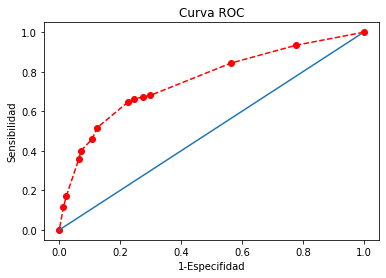

In [147]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [152]:
from sklearn import metrics
from plotnine import *

In [154]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [157]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})

In [158]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


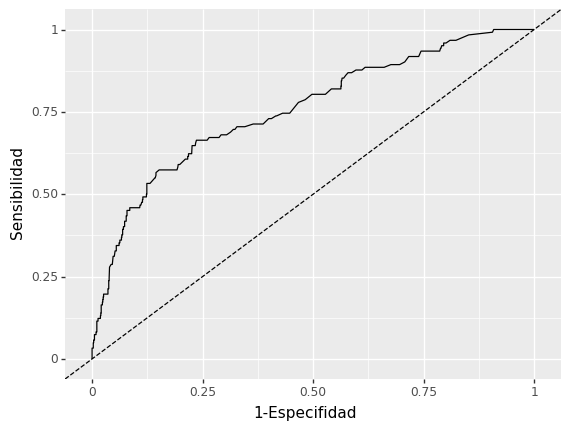

<ggplot: (-9223371892835848188)>

In [169]:
ggplot(df, aes(x="x", y="y"))+geom_line()+geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [162]:
auc = metrics.auc(espc_1, sensit)
auc # Area Under Curve

0.7575712982311564

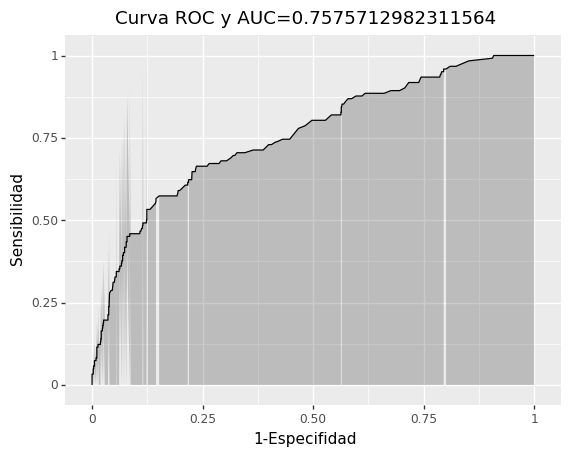

<ggplot: (-9223371892835023732)>

In [170]:
ggplot(df, aes(x="x", y="y")) + geom_area(alpha=0.25)+geom_line(aes(y="y"))+ggtitle("Curva ROC y AUC=%s" %str(auc))+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")